# TP Final - Redes Neuronales Convolucionales
## Mellino, Natalia - Introducción al Aprendizaje Automatizado

In [29]:
# Imports

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Ejemplo

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

## Ejercicio 1

In [ ]:
def ej1():
  # Agregamos las capas
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  # model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )

  return history, model

In [ ]:
history, model = ej1()

170508288/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1250/1250 [==============================] - 18s 6ms/step - loss: 1.5380 - accuracy: 0.4338 - val_loss: 1.2087 - val_accuracy: 0.5677
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1254 - accuracy: 0.5975 - val_loss: 1.0794 - val_accuracy: 0.6185
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9371 - accuracy: 0.6693 - val_loss: 0.9572 - val_accuracy: 0.6607
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8225 - accuracy: 0.7102 - val_loss: 0.8904 - val_accuracy: 0.6942
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7276 - accuracy: 0.7435 - val_loss: 0.8986 - val_accuracy: 0.6963
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6561 - accuracy: 0.7672 - val_loss: 0.8553 - val_accuracy: 0.7091
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step 

### Resultados

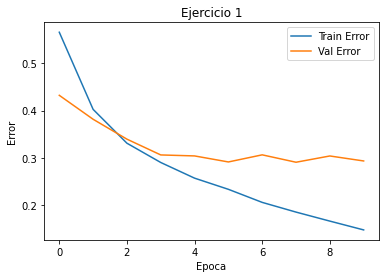

In [ ]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(list(train_error), label='Train Error')
plt.plot(list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 1')
plt.show()


In [ ]:
# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final {1 - test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0739 - accuracy: 0.6967
Test error en el modelo final 0.30330002307891846


### Conclusiones

ta malisimo la verda creo que hay un toq de overfitting 

## Ejercicio 2

In [2]:
def ej2():
  ps = [0.2, 0.5]
  results = []
  for p in ps:
    # Agregamos las capas
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Flatten())
    model.add(layers.Dense(64))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Dense(128))
    model.add(layers.Dense(128))
    model.add(layers.Dense(10))

    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalizamos como lo hace el ejemplo del tutorial
    train_images, test_images = train_images / 255.0, test_images / 255.0


    # Separamos conjunto de validación
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=0
    )

    # Compilamos y entrenamos

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    history = model.fit(
        train_images, 
        train_labels, 
        epochs=20,
        validation_data=(val_images, val_labels)
    )

    results.append((history, model))

  return results

In [3]:
models = ej2()

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/20
1250/1250 [==============================] - 22s 6ms/step - loss: 1.5714 - accuracy: 0.4180 - val_loss: 1.2349 - val_accuracy: 0.5534
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1997 - accuracy: 0.5692 - val_loss: 1.1482 - val_accuracy: 0.5965
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0218 - accuracy: 0.6392 - val_loss: 0.9909 - val_accuracy: 0.6463
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9095 - accuracy: 0.6796 - val_loss: 0.8731 - val_accuracy: 0.6926
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8328 - accuracy: 0.7081 - val_loss: 0.9106 - val_accuracy: 0.6824
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7738 - accuracy: 0.7300 - val_loss: 0.8722 - val_accuracy: 0.7027
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step 

### Resultados

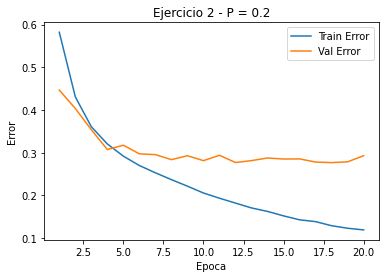

313/313 [==============================] - 1s 3ms/step - loss: 1.1181 - accuracy: 0.6956
Test error en el modelo final para p = 0.2: 0.3044000267982483


In [4]:
# p = 0.2

history, model = models[0]
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 2 - P = 0.2')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final para p = 0.2: {1 - test_acc}")


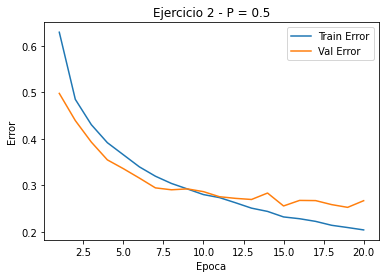

313/313 [==============================] - 1s 3ms/step - loss: 0.8062 - accuracy: 0.7328
Test error en el modelo final para p = 0.5: 0.2671999931335449


In [5]:
# p = 0.5

history, model = models[1]
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 2 - P = 0.5')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final para p = 0.5: {1 - test_acc}")

### Conclusiones

Hay menos sobreajuste con p = 0.5

## Ejercicio 3

In [12]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

def ej3():

  # Agregamos las capas
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [13]:
history, model = ej3()

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.7981 - accuracy: 0.3310 - val_loss: 1.5365 - val_accuracy: 0.4555
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5446 - accuracy: 0.4373 - val_loss: 1.3824 - val_accuracy: 0.5180
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4457 - accuracy: 0.4767 - val_loss: 1.2969 - val_accuracy: 0.5353
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3809 - accuracy: 0.5024 - val_loss: 1.2830 - val_accuracy: 0.5503
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3268 - accuracy: 0.5271 - val_loss: 1.1771 - val_accuracy: 0.5922
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2830 - accuracy: 0.5412 - val_loss: 1.2079 - val_accuracy: 0.5810
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2454 - accuracy: 0.5571 - val_loss: 1.1218 - val_accuracy

### Resultados

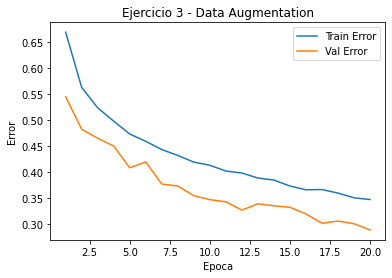

313/313 [==============================] - 1s 3ms/step - loss: 0.9023 - accuracy: 0.7064
Test error en el modelo final: 0.29360002279281616


In [14]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 3 - Data Augmentation')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final: {1 - test_acc}")

### Conclusiones

Si hay menos sobreajuste

## Ejercicio 4

### Resultados

### Conclusiones

## Ejercicio 5

In [36]:
def ej5():
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
            # tf.keras.layers.RandomBrightness(0.3),
      ]
  )

  # Agregamos las capas
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [37]:
history, model = ej5()

Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7764 - accuracy: 0.3418 - val_loss: 1.4822 - val_accuracy: 0.4618
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5344 - accuracy: 0.4363 - val_loss: 1.4583 - val_accuracy: 0.4653
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4411 - accuracy: 0.4726 - val_loss: 1.2984 - val_accuracy: 0.5314
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3758 - accuracy: 0.5049 - val_loss: 1.2013 - val_accuracy: 0.5688
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3260 - accuracy: 0.5282 - val_loss: 1.2007 - val_accuracy: 0.5901
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2855 - accuracy: 0.5442 - val_loss: 1.1387 - val_accuracy: 0.6022
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2549 - accuracy: 0.5530 - val_loss: 1.1166 - val_accuracy:

### Resultados

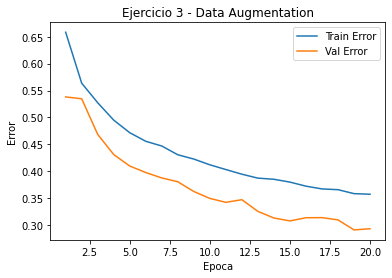

313/313 [==============================] - 1s 3ms/step - loss: 0.8988 - accuracy: 0.6954
Test error en el modelo final: 0.3046000003814697


In [38]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 3 - Data Augmentation')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final: {1 - test_acc}")

### Conclusiones

no hace mucha diferencia, no se pueden aplicar transformaciones que modifiquen el tamaño de la imagen porq se vuelve todo loco